# Used Cars Price Prediction with XGBRegressor 

## Project Description
This project focuses on building a predictive model for estimating used car prices using the XGBoost regression algorithm. The approach incorporates data preprocessing, feature engineering, model training with hyperparameter optimization, and model evaluation. The project utilizes various techniques, including label encoding, one-hot encoding, and feature scaling, to process the dataset effectively.

#### Data Preparation and Preprocessing:
* **Loading the Data**: The dataset (`used_cars_clean.csv`) is loaded using pandas.
* **Initial Exploration**: Basic data exploration using `info()`, `nunique()`, and `head()` methods to understand the structure and unique values.
* **Column Cleaning**: The dataset is cleaned by dropping unnecessary columns, such as an unnamed column.
* **Feature Encoding and Scaling**:
    - **Label Encoding**: Applied to categorical columns like `make`, `body-style`, `drive-wheels`, `engine-type`, `num-of-cylinders`, and `fuel-system`.
    - **One-Hot Encoding**: Applied to columns such as `num-of-doors`, `engine-location`, and `horsepower-binned`.
    - **Feature Scaling**: Standardized or MinMax-scaled numeric columns (e.g., `normalized-losses`, `wheel-base`, `length`, etc.), excluding the target column (`price`).

#### Model Training (XGBoost with Hyperparameter Optimization):
* **Model Selection**: The XGBoost Regressor (`XGBRegressor`) is used for building the predictive model.
* **Hyperparameter Tuning**:
    - **RandomizedSearchCV**: Used for tuning hyperparameters such as `max_depth`, `n_estimators`, `learning_rate`, and `reg_lambda`.
    - **Training Process**: Model training is performed using the training set, and the best hyperparameters are identified based on R² score using cross-validation.
* **Model Training Results**: The best model is selected and evaluated based on training and test R² scores.

#### Evaluation:
* **Metrics Calculation**: R² scores are calculated for training, validation, and testing datasets to assess model performance.
* **Feature Importance**: The importance of each feature is visualized using the `plot_importance()` function to understand which features have the greatest impact on predictions.
* **Residual Analysis**: A histogram of residuals is plotted to inspect the distribution of prediction errors.
* **Actual vs Predicted Visualization**: A scatter plot of actual vs. predicted values is created to visually evaluate prediction accuracy.


In [60]:
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import RandomizedSearchCV, validation_curve, learning_curve, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
import seaborn as sns; sns.set()
# Suppress the SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)
plt.rcParams['figure.figsize'] = (6, 4)

In [61]:
# Load the data
df = pd.read_csv('used_cars_clean.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    float64
 3   make               201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [63]:
df

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,nomalized-losses,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,122,Low,False,True,True,False
1,1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,122,Low,False,True,True,False
2,2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,122,Medium,False,True,True,False
3,3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,164,Low,False,True,True,False
4,4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,164,Low,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,5400.0,23,8.392857,16845.0,95,Low,False,True,True,False
197,197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,5300.0,19,9.400000,19045.0,95,Medium,False,True,False,True
198,198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,5500.0,18,10.217391,21485.0,95,Medium,False,True,True,False
199,199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,4800.0,26,8.703704,22470.0,95,Low,True,False,False,True


In [64]:
df.nunique()

Unnamed: 0           201
symboling              6
normalized-losses     51
make                  22
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
nomalized-losses      51
horsepower-binned      3
fuel-type-diesel       2
fuel-type-gas          2
aspiration-std         2
aspiration-turbo       2
dtype: int64

## Preprocessing

In [65]:
df = df.drop(columns=['Unnamed: 0'])

In [66]:
# Columns to encode with Label Encoding
label_encode_columns = [
    'make', 
    'body-style', 
    'drive-wheels', 
    'engine-type', 
    'num-of-cylinders', 
    'fuel-system'
]

one_hot_encoding_columns = [
    'num-of-doors',
    'engine-location',
    'horsepower-binned',
]

# Columns to scale
scale_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# 1. Label Encoding for specified columns
le = LabelEncoder()
for col in label_encode_columns:
    if col != 'price':  
        df[col] = le.fit_transform(df[col])

# 2. One-Hot Encoding for specified columns
df = pd.get_dummies(df, columns=one_hot_encoding_columns, drop_first=True)

# 3. Scaling the numeric columns (excluding 'price')
# scaler = StandardScaler()  # Or use MinMaxScaler() if preferred
# df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [67]:
df

,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,...,price,nomalized-losses,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,num-of-doors_two,engine-location_rear,horsepower-binned_Low,horsepower-binned_Medium
0,3,122.0,0,0,2,88.6,0.811148,0.890278,0.816054,2548,...,13495.0,122,False,True,True,False,True,False,True,False
1,3,122.0,0,0,2,88.6,0.811148,0.890278,0.816054,2548,...,16500.0,122,False,True,True,False,True,False,True,False
2,1,122.0,0,2,2,94.5,0.822681,0.909722,0.876254,2823,...,16500.0,122,False,True,True,False,True,False,False,True
3,2,164.0,1,3,1,99.8,0.848630,0.919444,0.908027,2337,...,13950.0,164,False,True,True,False,False,False,True,False
4,2,164.0,1,3,0,99.4,0.848630,0.922222,0.908027,2824,...,17450.0,164,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,21,3,2,109.1,0.907256,0.956944,0.928094,2952,...,16845.0,95,False,True,True,False,False,False,True,False
197,-1,95.0,21,3,2,109.1,0.907256,0.955556,0.928094,3049,...,19045.0,95,False,True,False,True,False,False,False,True
198,-1,95.0,21,3,2,109.1,0.907256,0.956944,0.928094,3012,...,21485.0,95,False,True,True,False,False,False,False,True
199,-1,95.0,21,3,2,109.1,0.907256,0.956944,0.928094,3217,...,22470.0,95,True,False,False,True,False,False,True,False


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   symboling                 201 non-null    int64  
 1   normalized-losses         201 non-null    float64
 2   make                      201 non-null    int64  
 3   body-style                201 non-null    int64  
 4   drive-wheels              201 non-null    int64  
 5   wheel-base                201 non-null    float64
 6   length                    201 non-null    float64
 7   width                     201 non-null    float64
 8   height                    201 non-null    float64
 9   curb-weight               201 non-null    int64  
 10  engine-type               201 non-null    int64  
 11  num-of-cylinders          201 non-null    int64  
 12  engine-size               201 non-null    int64  
 13  fuel-system               201 non-null    int64  
 14  bore      

## Split the data into features and target

In [69]:
X = df.drop(columns=['price'])

In [70]:
y = df['price']

In [71]:
X.head()

,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,...,highway-mpg,nomalized-losses,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,num-of-doors_two,engine-location_rear,horsepower-binned_Low,horsepower-binned_Medium
0,3,122.0,0,0,2,88.6,0.811148,0.890278,0.816054,2548,...,8.703704,122,False,True,True,False,True,False,True,False
1,3,122.0,0,0,2,88.6,0.811148,0.890278,0.816054,2548,...,8.703704,122,False,True,True,False,True,False,True,False
2,1,122.0,0,2,2,94.5,0.822681,0.909722,0.876254,2823,...,9.038462,122,False,True,True,False,True,False,False,True
3,2,164.0,1,3,1,99.8,0.848630,0.919444,0.908027,2337,...,7.833333,164,False,True,True,False,False,False,True,False
4,2,164.0,1,3,0,99.4,0.848630,0.922222,0.908027,2824,...,10.681818,164,False,True,True,False,False,False,True,False


In [72]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4700)

## XGBRegressor Model

In [74]:
xgb = XGBRegressor()

In [75]:
param_distributions = {
    'max_depth': range(1, 7),
    'n_estimators': range(10, 201, 10),
    'learning_rate': np.linspace(0.001, 0.05, 35),
    'reg_lambda': np.linspace(0.05, 2.0, 50),
}

In [76]:
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_distributions,
    n_iter=200,
    scoring=make_scorer(r2_score),
    cv=5,
    n_jobs=-1,
    random_state=4700
)

In [77]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
       0.84591837, 0.88571429, 0.9255102 , 0.96530612, 1.00510204,
       1.04489796, 1.08469388, 1.1244898 , 1.16428571, 1.20408163,
       1.24387755, 1.28367347, 1.32346939, 1.36326531, 1.40306122,
       1.44285714, 1.48265306, 1.52244898, 1.5622449 , 1.60204082,
       1.64183673, 1.68163265, 1.72142857, 1.76122449, 1.80102041,
       1.84081633, 1.88061224, 1.92040816, 1.96020408, 2.        ])},
                   random_state=4700,
                   scoring=make_scorer(r2_score, response_method='predict'))

In [78]:
best_model = random_search.best_estimator_

In [79]:
print('Best hyperparameters:', random_search.best_params_)
print('Best R^2:', random_search.best_score_)

Best hyperparameters: {'reg_lambda': 0.3683673469387755, 'n_estimators': 190, 'max_depth': 3, 'learning_rate': 0.03270588235294118}
Best R^2: 0.925245047527123


### Feature Importance

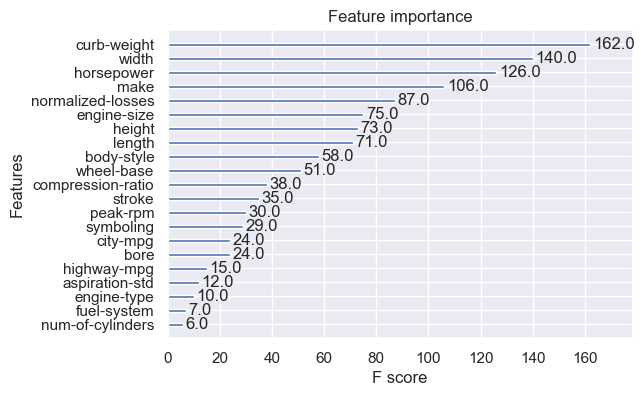

In [80]:
plot_importance(best_model)
plt.show()

### Training and Testing Scores

In [81]:
#predict
y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
print('Training R^2:', r2_score(y_train, y_train_pred))
print('Validation R^2:', random_search.best_score_)
print('Testing R^2:', r2_score(y_test, y_pred))

Training R^2: 0.9897982772902701
Validation R^2: 0.925245047527123
Testing R^2: 0.878697029925129


## Plotting Testing Results

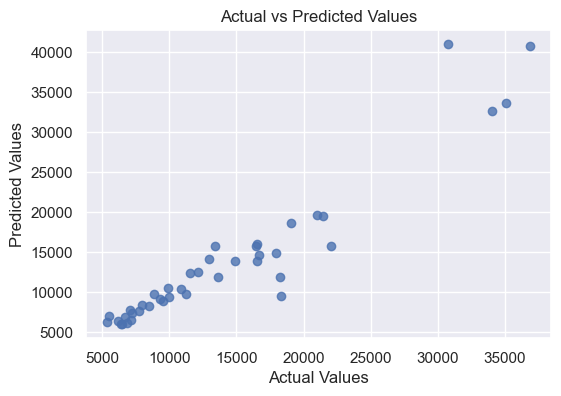

In [82]:
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

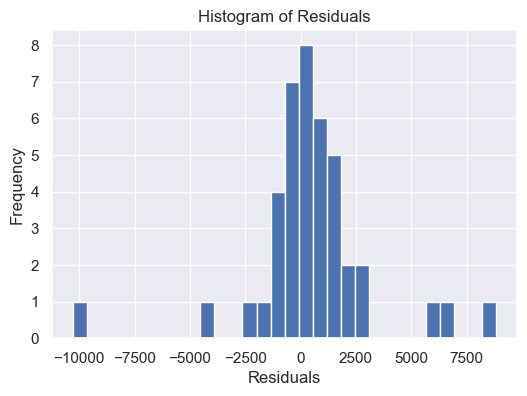

In [83]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()